In [2]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from rdkit import Chem
from sklearn.model_selection import GridSearchCV
from rdkit.Chem import MACCSkeys, rdmolops, AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore', message='use MorganGenerator')

In [3]:
data = pd.read_csv("./dataset_medicine/train_original-2.csv")

train_data, test_data = train_test_split(data, test_size = 0.3, random_state=42, shuffle=True)

train_data.to_csv("./dataset_medicine/train.csv", index=False)
test_data.to_csv("./dataset_medicine/test.csv", index=False)

In [4]:
train_df = pd.read_csv("./dataset_medicine/train.csv")
test_df = pd.read_csv("./dataset_medicine/test.csv")

In [5]:
train_df.head()

,Molecule ChEMBL ID,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,IC50_nM,pIC50,Smiles
0,CHEMBL5207748,IC50,'=',11.0,nM,7.96,CHEMBL5122777,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL5120828,11.0,7.96,CN1CCC(n2cc(Nc3nc(NC4(C)CC4)c4c(=O)n(-c5nnc[nH...
1,CHEMBL208561,IC50,'=',25000.0,nM,4.60,CHEMBL870864,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL1147720,25000.0,4.60,COC(=O)c1ccc2[nH]c(NC(=O)c3cccc([N+](=O)[O-])c...
2,CHEMBL3945366,IC50,'=',17.0,nM,7.77,CHEMBL3887118,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL3886172,17.0,7.77,CC(C)(C)NC(=O)c1cnc(-n2ncc3cc(C#N)cnc32)cc1Nc1...
3,CHEMBL3983974,IC50,'=',780.0,nM,6.11,CHEMBL3887893,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL3886492,780.0,6.11,CC(O)CNc1nc(N2CCOCC2)[nH]c(=O)c1-c1nc2ccccc2s1
4,CHEMBL4106923,IC50,'=',554.0,nM,6.26,CHEMBL3887893,CHEMBL3778,Interleukin-1 receptor-associated kinase 4,Homo sapiens,SINGLE PROTEIN,CHEMBL3886492,554.0,6.26,Cc1csc(-c2c(N[C@@H]3CCCNC3)nc(N3CCOCC3)[nH]c2=...


In [9]:
pd.set_option('display.max_colwidth', None)
print(train_df["Smiles"].head())

0    CN1CCC(n2cc(Nc3nc(NC4(C)CC4)c4c(=O)n(-c5nnc[nH]5)ccc4n3)cn2)CC1
1              COC(=O)c1ccc2[nH]c(NC(=O)c3cccc([N+](=O)[O-])c3)nc2c1
2        CC(C)(C)NC(=O)c1cnc(-n2ncc3cc(C#N)cnc32)cc1Nc1cnn(CC(F)F)c1
3                     CC(O)CNc1nc(N2CCOCC2)[nH]c(=O)c1-c1nc2ccccc2s1
4                 Cc1csc(-c2c(N[C@@H]3CCCNC3)nc(N3CCOCC3)[nH]c2=O)n1
Name: Smiles, dtype: object


In [10]:
train_df.describe()

,Standard Value,pChEMBL Value,IC50_nM,pIC50
count,1366.000000,1366.000000,1366.000000,1366.000000
mean,633.458115,7.527196,633.458115,7.527196
std,2766.461362,1.107301,2766.461362,1.107301
min,0.022000,4.260000,0.022000,4.260000
25%,4.100000,6.690000,4.100000,6.690000
50%,15.700000,7.800000,15.700000,7.800000
75%,205.250000,8.390000,205.250000,8.390000
max,55000.000000,10.660000,55000.000000,10.660000


In [26]:
train_df["Target Type"].value_counts()

Target Type
SINGLE PROTEIN    1366
Name: count, dtype: int64

In [11]:
test_df.describe()

,Standard Value,pChEMBL Value,IC50_nM,pIC50
count,586.000000,586.000000,586.000000,586.000000
mean,685.233582,7.498515,685.233582,7.498515
std,2320.210546,1.110179,2320.210546,1.110179
min,0.078000,4.520000,0.078000,4.520000
25%,4.025000,6.670000,4.025000,6.670000
50%,14.000000,7.850000,14.000000,7.850000
75%,215.375000,8.397500,215.375000,8.397500
max,30000.000000,10.110000,30000.000000,10.110000


In [12]:
print(train_df.isnull().sum())

Molecule ChEMBL ID    0
Standard Type         0
Standard Relation     0
Standard Value        0
Standard Units        0
pChEMBL Value         0
Assay ChEMBL ID       0
Target ChEMBL ID      0
Target Name           0
Target Organism       0
Target Type           0
Document ChEMBL ID    0
IC50_nM               0
pIC50                 0
Smiles                0
dtype: int64


In [13]:
print(test_df.isnull().sum())

Molecule ChEMBL ID    0
Standard Type         0
Standard Relation     0
Standard Value        0
Standard Units        0
pChEMBL Value         0
Assay ChEMBL ID       0
Target ChEMBL ID      0
Target Name           0
Target Organism       0
Target Type           0
Document ChEMBL ID    0
IC50_nM               0
pIC50                 0
Smiles                0
dtype: int64


In [14]:
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        return np.array(fp)
    else:
        return np.zeros((2048,))

In [17]:
train = train_df[['Smiles','pIC50']]
train['Fingerprint'] = train['Smiles'].apply(smiles_to_fingerprint)

x_train = np.stack(train['Fingerprint'].values)
y_train = train['pIC50'].values

test = test_df[['Smiles','pIC50']]
test['Fingerprint'] = test['Smiles'].apply(smiles_to_fingerprint)

x_test = np.stack(test['Fingerprint'].values)
y_test = test['pIC50'].values


/var/folders/w6/v6t6487929x0yhgjs532lfxw0000gn/T/ipykernel_69524/564893578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fingerprint'] = train['Smiles'].apply(smiles_to_fingerprint)
/var/folders/w6/v6t6487929x0yhgjs532lfxw0000gn/T/ipykernel_69524/564893578.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fingerprint'] = test['Smiles'].apply(smiles_to_fingerprint)


In [67]:
smiles = "CCO"
mol = Chem.MolFromSmiles(smiles)

fp0 = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
print("0. Morgan (기존)", len(fp0))
print(fp0.ToBitString())

fp1 = MACCSkeys.GenMACCSKeys(mol)
print("\n1. MACCS keys", len(fp1))
print(fp1.ToBitString())

fp2 = rdmolops.RDKFingerprint(mol)
print("\n2. Topological FP", len(fp2))
print(fp2.ToBitString())

0. Morgan (기존) 2048
00000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [70]:
#model = RandomForestRegressor(random_state=42)
#model.fit(x_train,y_train)

In [ ]:
param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.09,0.08],
    "estimator__max_depth": [1],
    "estimator__min_samples_leaf": [4,5,10]
}

#grid Search
grid = GridSearchCV(
    estimator=AdaBoostRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        random_state=42
    ),
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=0,
    return_train_score=True
)
grid.fit(x_train,y_train)

best_model = grid.best_estimator_
pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, pred)

#결과
print("Best Params:", grid.best_params_)
print("Best CV MSE:", grid.best_score_)
print("Test MSE     :", mse)

In [ ]:
#전체 결과를 표로 
res = pd.DataFrame(grid.cv_results_)
res["mean_MSE"] = -res["mean_test_score"]

cols = [
    "param_estimator__max_depth",
    "param_n_estimators",
    "param_learning_rate",
    "mean_MSE"
]
print(res[cols].sort_values("mean_MSE").head(10))

In [45]:
#각 하이퍼파라미터의 단독 효과 확인(경향)
print("\n== max_depth 별 평균 MSE ==")
print(res.groupby("param_estimator__max_depth")["mean_MSE"].mean().sort_values())

print("\n== n_estimators 별 평균 MSE ==")
print(res.groupby("param_n_estimators")["mean_MSE"].mean().sort_values())

print("\n== learning_rate 별 평균 MSE ==")
print(res.groupby("param_learning_rate")["mean_MSE"].mean().sort_values())


== max_depth 별 평균 MSE ==
param_estimator__max_depth
1    0.92944
Name: mean_MSE, dtype: float64

== n_estimators 별 평균 MSE ==
param_n_estimators
100    0.91765
200    0.94123
Name: mean_MSE, dtype: float64

== learning_rate 별 평균 MSE ==
param_learning_rate
0.1    0.92944
Name: mean_MSE, dtype: float64


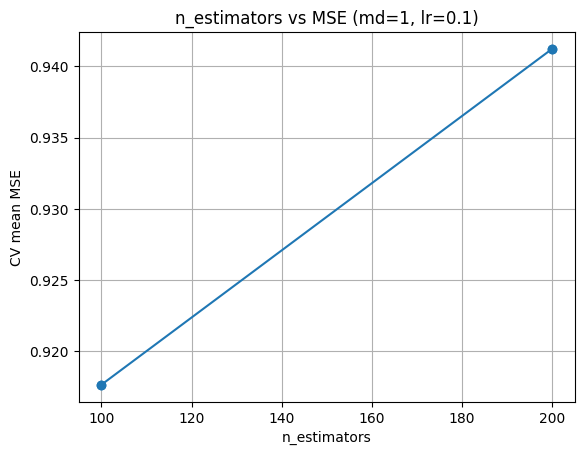

In [46]:
best = grid.best_params_
md_best = best["estimator__max_depth"]
ne_best = best["n_estimators"]
lr_best = best["learning_rate"]

a = res[
    (res["param_estimator__max_depth"] == md_best) &
    (res["param_learning_rate"] == lr_best)
    ].sort_values("param_n_estimators")

plt.figure()
plt.plot(a["param_n_estimators"], a["mean_MSE"], marker = 'o')
plt.title(f"n_estimators vs MSE (md={md_best}, lr={lr_best})")
plt.xlabel("n_estimators")
plt.ylabel("CV mean MSE")
plt.grid(True)
plt.show()

In [47]:
model = AdaBoostRegressor(
    estimator = DecisionTreeRegressor(max_depth=1,
                                     min_samples_leaf=4,random_state=42),
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
model.fit(x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1,
                                                  min_samples_leaf=4,
                                                  random_state=42),
                  learning_rate=0.1, n_estimators=200, random_state=42)

In [48]:
pred = model.predict(x_test)

mse = mean_squared_error(y_test, pred)

print("mse value : ", mse)

mse value :  0.9322334830977583
